**Name: Priyanka A** <br>
**School: Computing and Data Sciences** <br>
Email: priyanka.a-26@scds.saiuniversity.edu.in

<div></div>

### Dataset

The Car Images Dataset dataset is used for this project. 

## Original Dataset

1. Total images: 4165
2. Classes: 7 ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
3. Images per class: [1013, 338, 391, 385, 526, 547, 965]
4. Training samples: 3123, Testing samples: 1042

## Subset Dataset

To ease training, a selection of 200 samples per category was used to form the subset dataset. 
1. **Total images: 1400**
2. **Classes: 7 ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']**
3. **Images per class: [200, 200, 200, 200, 200, 200, 200]**
4. **Training samples: 1050, Testing samples: 350**

The subset dataset is split into 75% training and 25% testing.

### Pretrained models

Task is to train the following three pretrained CNN models by applying both Transfer-Learning and Fine-Tuning.
1. Model-1: ResNet101V2
2. Model-2: InceptionResNetV2
3. Model-3: DenseNet201

# Part 2
# Model-1: ResNet101V2
Subtask 1: Apply the following modifcations to the default classifier layers of the model during Transfer-Learning:

1. Model-1 → **Set the initial 25% of the layers are non-trainable and remaining layers as trainable**
2. Apply fine-tuning on the best performing TL models for 10 epochs and preserve the best performing FT models

Total images: 1400
Classes: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
Images per class: [200, 200, 200, 200, 200, 200, 200]
Training samples: 1050, Testing samples: 350
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7224 - loss: 0.8985 - val_accuracy: 0.8667 - val_loss: 0.4380
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.9724 - loss: 0.0952 - val_accuracy: 0.9238 - val_loss: 0.3797
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9429 - val_loss: 0.2413
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9429 - val_loss: 0.1909
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9429 - val_loss: 0.1480
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 1.0000 - loss: 6.5383e-04 - val_accuracy: 0.9429 - val_loss: 0.1281


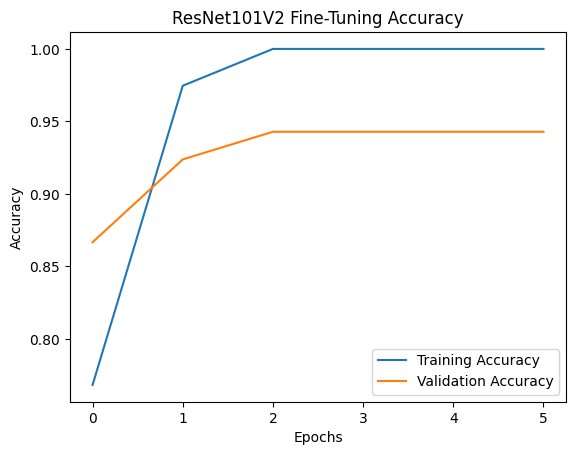





11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.9118 - loss: 0.2882
Test Loss: 0.2933148443698883, Test Accuracy: 0.9142857193946838


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 531ms/step




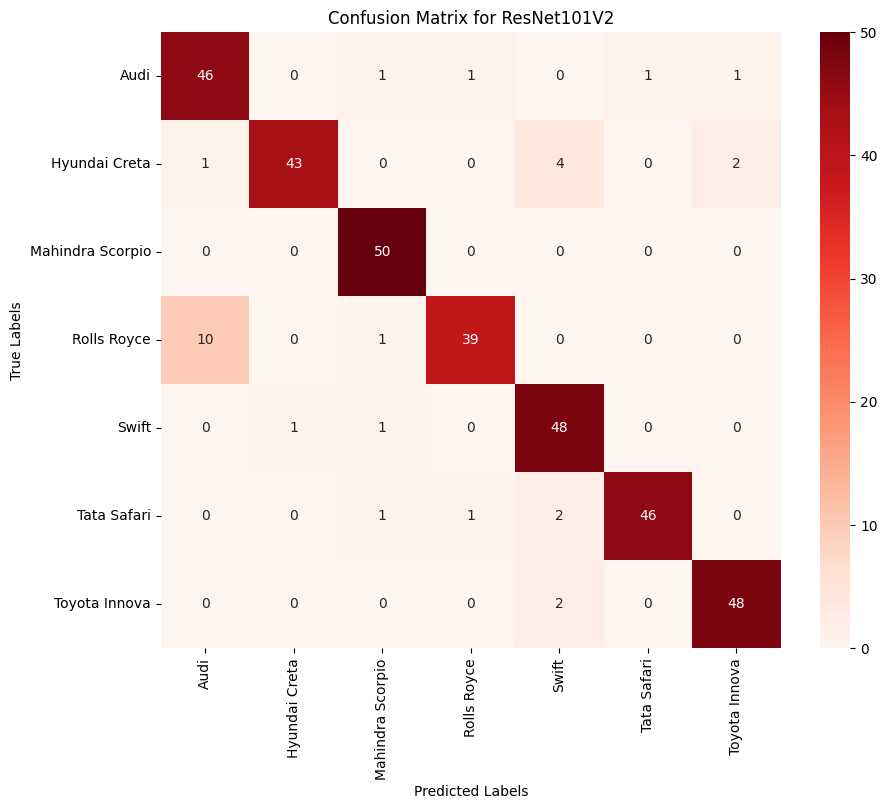



Precision: 0.9197826344628337
Recall: 0.9142857142857143
F1-Score: 0.9139995792750868


In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Subset the dataset
dataset_path = "../input/car-images-dataset/Car_Dataset"
categories = ["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]

# Load images and labels
images, labels = [], []
for i, category in enumerate(categories):
    image_files = glob(os.path.join(dataset_path, category, "*.jpg"))
    selected_files = image_files[:200]  # Select subset (200) number of samples per category
    for file in selected_files:
        img = Image.open(file).convert("RGB")  # Ensure all images are RGB
        img = img.resize((224, 224))  # Resizing for model input
        images.append(np.array(img))
        labels.append(i)

# Convert to numpy arrays
images = np.array(images) / 255.0  # Normalize
labels = np.array(labels)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, stratify=labels, random_state=42)

# Check dataset details
print(f"Total images: {len(images)}")
print(f"Classes: {categories}")
print(f"Images per class: {[labels.tolist().count(i) for i in range(len(categories))]}")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


# Fine-Tuning ResNet101V2 (Model-1)

# Load the best Transfer Learning model
model = keras.models.load_model("/kaggle/input/model1-tl/resnet101v2_tl_best.keras")


# Set the first 25% of layers as non-trainable
num_layers = len(model.layers)
freeze_layers = int(0.25 * num_layers)
for layer in model.layers[:freeze_layers]:
    layer.trainable = False
for layer in model.layers[freeze_layers:]:
    layer.trainable = True

# Compile the model for Fine-Tuning
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
callbacks = [
    keras.callbacks.ModelCheckpoint("resnet101v2_ft_best.keras", save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    callbacks=callbacks
)

# Plot accuracy
print("\n")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet101V2 Fine-Tuning Accuracy')
plt.show()
print("\n")

# Evaluate the model on the test set
print("\n")
model.load_weights("resnet101v2_ft_best.keras")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print("\n")

# Generate Confusion Matrix and Classification Report
y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)
print("\n")

# Visualize the Confusion Matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ResNet101V2')
plt.show()
print("\n")

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
